In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [17]:
nba = pd.read_csv('nba_games.csv')

In [18]:
# Subset Data to 2010 Season, 2014 Season
#Let's analyze relationships between quantitative and categorical variables 
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

print(nba_2010.head())
print(nba_2014.head())

            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  
            game_id  year_id  fran_id   opp_fran game_location  is_playoffs  \
23468  201310300CLE     2014     Nets  Cavaliers             A            0   
23469  201310

In [19]:
#creating two series for two teams 
knicks_pts_10 = nba_2010.pts[nba.fran_id == "Knicks"]
net_pts_10 = nba_2010.pts[nba.fran_id == "Nets"]

In [20]:
#Calculating their average score difference to check for any association

knick_means_score = np.mean(knicks_pts_10)
net_means_score = np.mean(net_pts_10)

diff_means_2010 = knick_means_score - net_means_score
print(diff_means_2010)

9.731707317073173


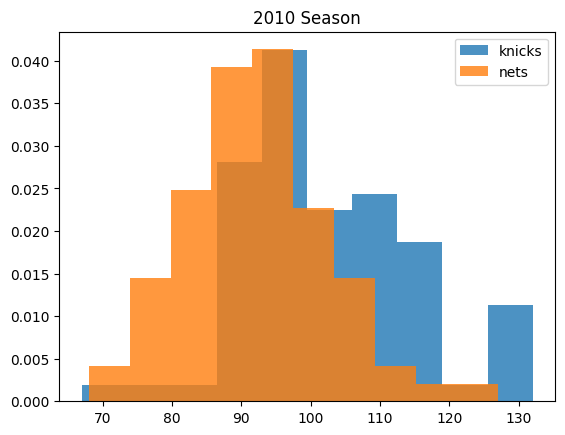

<Figure size 640x480 with 0 Axes>

In [21]:
#Creating a set of overlapping histograms for the points scored for the Knicks compared to the Nets
plt.hist(knicks_pts_10, alpha=0.8, density=True, label='knicks')

plt.hist(net_pts_10,alpha=0.8, density = True, label='nets')

plt.legend()

plt.title("2010 Season")

plt.show()

plt.clf()


0.44706798131809933


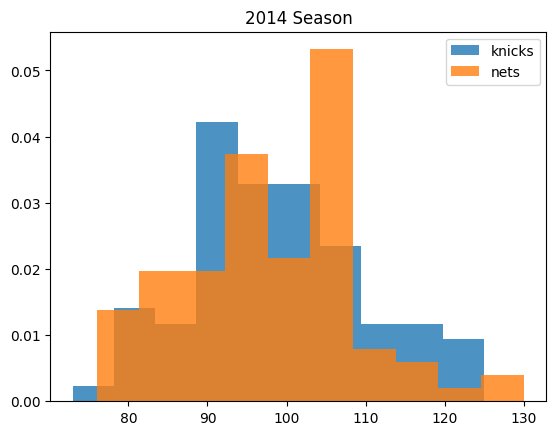

<Figure size 640x480 with 0 Axes>

In [37]:
#repeating the same for nba_2014
knicks_pts_14 = nba_2014.pts[nba.fran_id == "Knicks"]

net_pts_14 = nba_2014.pts[nba.fran_id == "Nets"]

knick_mean_score_14 = np.mean(knicks_pts_14)
net_mean_score_14 = np.mean(net_pts_14)

diff_means_2014 = knick_mean_score_14 - net_mean_score_14

print(diff_means_2014)

plt.hist(knicks_pts_14, alpha=0.8, density=True, label='knicks')

plt.hist(net_pts_14,alpha=0.8, density=True, label='nets')

plt.legend()

plt.title("2014 Season")

plt.show()

plt.clf()

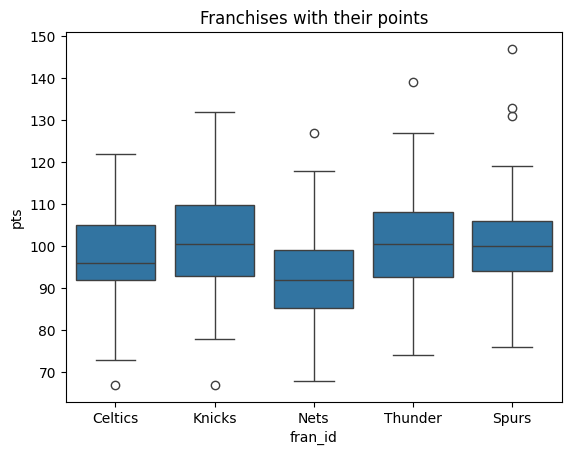

<Figure size 640x480 with 0 Axes>

In [38]:
#Creating a side by side boxplot to check if points and franchise_id are associated
sns.boxplot(data=nba_2010,y='pts',x='fran_id')

plt.title('Franchises with their points')

plt.show()

plt.clf()

Till now these charts don't suggest that any strong association exists between fran_id and pts as these two variables overlap a lot in the histograms and the boxplot as well

In [39]:
#Analyzing relationships between Categorical variables
# Now let's find out if teams tend to win more games at home compared to away. For this let's create a contingency table of frequencies
location_result_freq = pd.crosstab(nba_2010.game_result,nba_2010.game_location)

print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


Teams win more games at home compared to away so they might be associated, it seems like that for now.

In [40]:
#Converting this table of frequencies to a table of proportions to get a better look
location_result_proportions = location_result_freq/len(nba_2010)*100

print(location_result_proportions)

game_location          A          H
game_result                        
L              29.555556  23.333333
W              20.444444  26.666667


In [32]:
#calculating the expected contingency table (if there were no association) and the Chi-Square statistic for the final assessment
chi2, pval, dof, expected = chi2_contingency(location_result_freq)

print(expected)
print(chi2)


[[119. 119.]
 [106. 106.]]
6.501704455367053


Given the discrepancies between the actual and expected frequencies and the Chi-square statistic, it appears there is an association
between the variables (game result and game location). This means that the outcome of games (win or lose) tends to be related to whether they are played at home or away.

Analyzing Relationships Between Quantitative Variables-

We want to know if teams with a higher probability of winning also tend to win games by more points.

In [34]:
#Calculating the covariance between forecast(projected win probability) and point_diff((the margin of victory/defeat)

point_diff_forecast_cov = np.cov(nba_2010.forecast,nba_2010.point_diff)

print(point_diff_forecast_cov)

[[  0.05   1.37]
 [  1.37 186.56]]


the covariance between these two variables is 1.37

Because forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

In [35]:
#calculating the pearson correlation between forecast and point_diff
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)

print(point_diff_forecast_corr)

PearsonRResult(statistic=0.4402088708468082, pvalue=9.410391573139846e-23)


The correlation coefficient is approximately 0.44. This value suggests a moderate positive association between forecast and point_diff. It indicates that as the forecast value increases, the point difference tends to increase as well

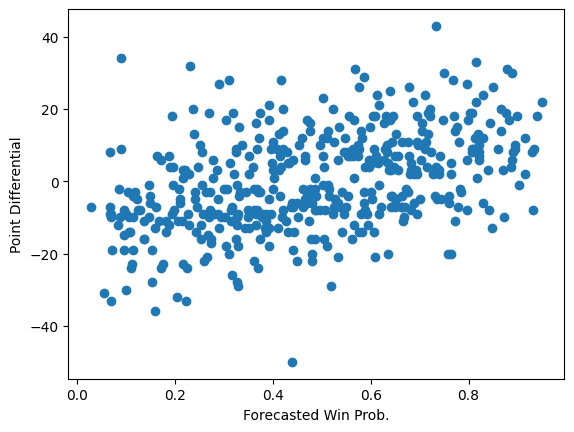

<Figure size 640x480 with 0 Axes>

In [36]:
#Creating a scatter plot of forecast and point_diff
plt.scatter(data=nba_2010,x='forecast',y='point_diff')

plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')

plt.show()

plt.clf()

The upward trend indicates a positive relationship between forecast and point_diff, which aligns with the correlation coefficient of approximately 0.44 obtained. This suggests that as the forecast increases, the point difference tends to increase as well,this confirms that there is a moderate positive association between the two variables